# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('../diabetes.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Periksa Ringkasan Statistik

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Periksa Nilai Unik di Kolom Tertentu (Outcome)

In [5]:
cols = ['Outcome']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Outcome has [1 0] values



# Validasi Data

# Cek Missing Values di Setiap Kolom

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cek Data Duplikat

In [7]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Membagi Dataset Berdasarkan Tipe Data

In [8]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

# Data Numerik

In [9]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head())

Kolom Numerik:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Dataset Numerik:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# Data Kategorikal

In [10]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_categorical.head())


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
   Outcome
0        1
1        0
2        1
3        0
4        1


# Membagi Dataset Menjadi Data Training dan Data Testing

In [11]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data training dan data testing
X = df.drop('Outcome', axis=1)  # Fitur (tanpa kolom 'Outcome')
y = df['Outcome']  # Target (kolom 'Outcome')

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan kembali X_train dan y_train menjadi satu dataframe untuk diekspor
train_df = pd.concat([X_train, y_train], axis=1)

# Menggabungkan kembali X_test dan y_test menjadi satu dataframe untuk diekspor
test_df = pd.concat([X_test, y_test], axis=1)

# Mengekspor dataset training dan testing ke file CSV
train_df.to_csv('diabetes_train.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)

print("Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv")


Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv


# Data Training

In [12]:
# Menampilkan 5 baris pertama dari dataset training
print("Data Training:")
print(train_df.head())


Data Training:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1  


# Data Testing

In [13]:
# Menampilkan 5 baris pertama dari dataset testing
print("Data Testing:")
print(test_df.head())


Data Testing:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Outcome  
668                     0.430   43        0  
324                     0.148   21        0  
624                     0.158   21        0  
690                     0.856   34        0  
473                     0.210   50        0  


# Normalisasi dengan Metode Min-Max Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur training dan testing
X_train_scaled = scaler.fit_transform(X_train)  # Normalisasi data training
X_test_scaled = scaler.transform(X_test)  # Normalisasi data testing menggunakan scaler yang sudah fit

# Menggabungkan kembali X_train_scaled dan y_train menjadi satu dataframe untuk diekspor
train_scaled_df = pd.concat([pd.DataFrame(X_train_scaled, columns=X.columns), y_train.reset_index(drop=True)], axis=1)

# Menggabungkan kembali X_test_scaled dan y_test menjadi satu dataframe untuk diekspor
test_scaled_df = pd.concat([pd.DataFrame(X_test_scaled, columns=X.columns), y_test.reset_index(drop=True)], axis=1)

# Mengekspor dataset training dan testing yang sudah dinormalisasi ke file CSV
train_scaled_df.to_csv('diabetes_train_scaled.csv', index=False)
test_scaled_df.to_csv('diabetes_test_scaled.csv', index=False)

print("Data training dan testing berhasil dinormalisasi menggunakan MinMaxScaler dan diekspor ke diabetes_train_scaled.csv dan diabetes_test_scaled.csv")


Data training dan testing berhasil dinormalisasi menggunakan MinMaxScaler dan diekspor ke diabetes_train_scaled.csv dan diabetes_test_scaled.csv


# Data Training Ternormalisasi

In [15]:
# Menampilkan 5 baris pertama dari data training yang sudah dinormalisasi
print("Data Training Setelah Normalisasi:")
print(train_scaled_df.head())


Data Training Setelah Normalisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
1     0.529412  0.562814       0.672131       0.380952  0.000000  0.420268   
2     0.058824  0.698492       0.377049       0.301587  0.098109  0.427720   
3     0.000000  0.809045       0.409836       0.000000  0.000000  0.326379   
4     0.352941  0.673367       0.655738       0.587302  0.437352  0.688525   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.096499  0.000000        0  
1                  0.514091  0.483333        1  
2                  0.245944  0.016667        0  
3                  0.075149  0.733333        0  
4                  0.068318  0.416667        1  


# Data Testing Ternormalisasi

In [16]:
# Menampilkan 5 baris pertama dari data testing yang sudah dinormalisasi
print("Data Testing Setelah Normalisasi:")
print(test_scaled_df.head())


Data Testing Setelah Normalisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.492462       0.475410       0.523810  0.224586  0.506706   
1     0.117647  0.562814       0.614754       0.507937  0.000000  0.532042   
2     0.117647  0.542714       0.524590       0.000000  0.000000  0.459016   
3     0.470588  0.537688       0.655738       0.000000  0.000000  0.366617   
4     0.411765  0.683417       0.737705       0.000000  0.000000  0.445604   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.150299  0.366667        0  
1                  0.029889  0.000000        0  
2                  0.034159  0.000000        0  
3                  0.332195  0.216667        0  
4                  0.056362  0.483333        0  


# Feature Selection - Decision Trees

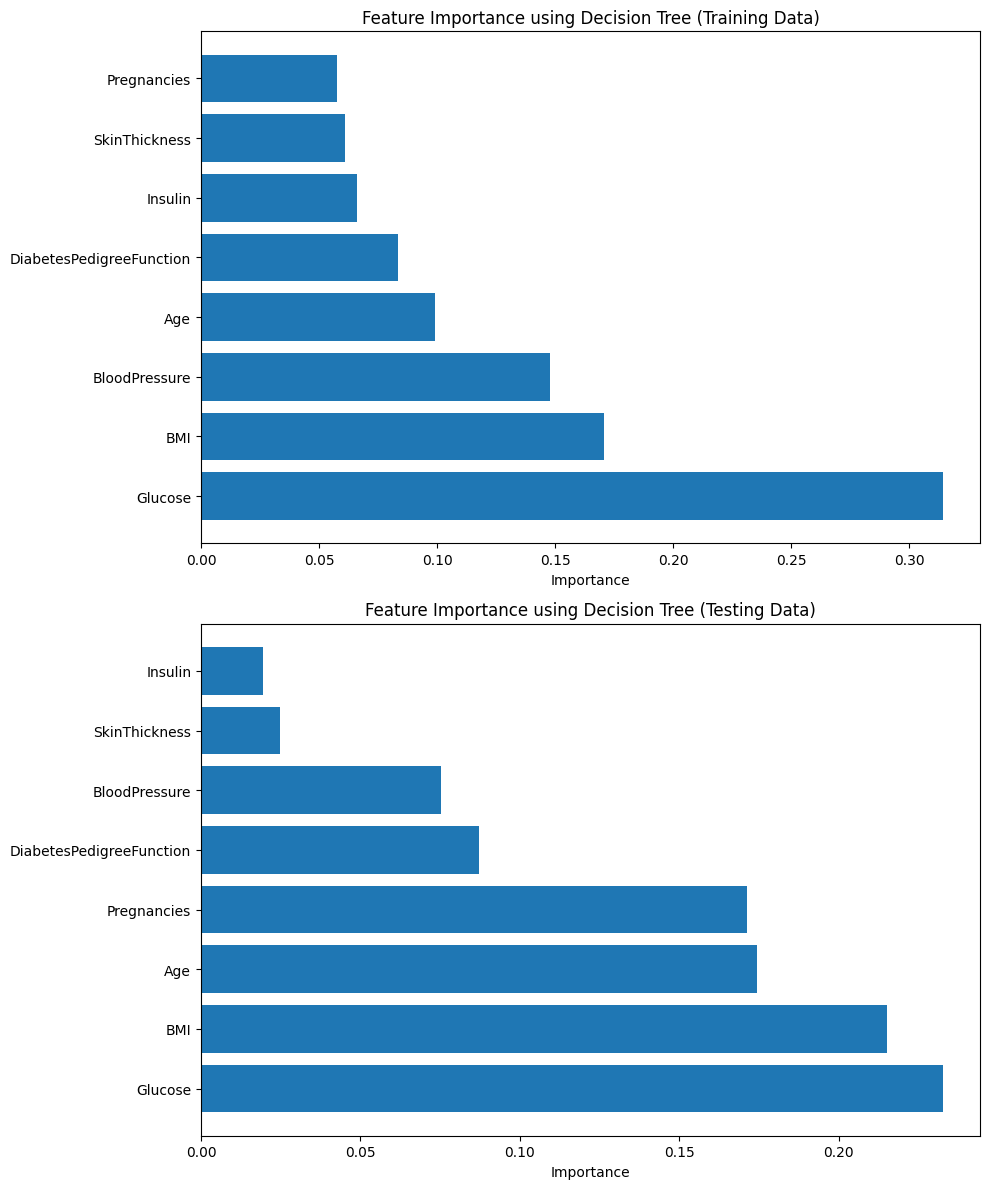

Training Data Feature Importance:
                     Feature  Importance
1                   Glucose    0.314225
5                       BMI    0.170700
2             BloodPressure    0.147679
7                       Age    0.099215
6  DiabetesPedigreeFunction    0.083282
4                   Insulin    0.066253
3             SkinThickness    0.061164
0               Pregnancies    0.057482

Testing Data Feature Importance:
                     Feature  Importance
1                   Glucose    0.232669
5                       BMI    0.215169
7                       Age    0.174479
0               Pregnancies    0.171236
6  DiabetesPedigreeFunction    0.087052
2             BloodPressure    0.075253
3             SkinThickness    0.024747
4                   Insulin    0.019394


In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Menyiapkan data fitur dan target untuk training
X_train_scaled = train_scaled_df.drop('Outcome', axis=1)  # Fitur dari data training
y_train = train_scaled_df['Outcome']  # Target: Outcome dari data training

# Menyiapkan data fitur dan target untuk testing
X_test_scaled = test_scaled_df.drop('Outcome', axis=1)  # Fitur dari data testing
y_test = test_scaled_df['Outcome']  # Target: Outcome dari data testing

# Melatih model Decision Tree untuk data training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Mengambil pentingnya fitur untuk data training
train_feature_importances = model.feature_importances_

# Melatih model Decision Tree untuk data testing
model.fit(X_test_scaled, y_test)

# Mengambil pentingnya fitur untuk data testing
test_feature_importances = model.feature_importances_

# Menampilkan pentingnya fitur untuk data training
train_feature_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': train_feature_importances
})

# Menampilkan pentingnya fitur untuk data testing
test_feature_df = pd.DataFrame({
    'Feature': X_test_scaled.columns,
    'Importance': test_feature_importances
})

# Mengurutkan berdasarkan pentingnya fitur untuk training dan testing
train_feature_df = train_feature_df.sort_values(by='Importance', ascending=False)
test_feature_df = test_feature_df.sort_values(by='Importance', ascending=False)

# Membuat subplot untuk menampilkan visualisasi training dan testing secara terpisah
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Visualisasi pentingnya fitur untuk data training
axes[0].barh(train_feature_df['Feature'], train_feature_df['Importance'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance using Decision Tree (Training Data)')

# Visualisasi pentingnya fitur untuk data testing
axes[1].barh(test_feature_df['Feature'], test_feature_df['Importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance using Decision Tree (Testing Data)')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan fitur yang paling penting untuk data training dan testing
print("Training Data Feature Importance:\n", train_feature_df)
print("\nTesting Data Feature Importance:\n", test_feature_df)


# Feature Selection - Random Forest

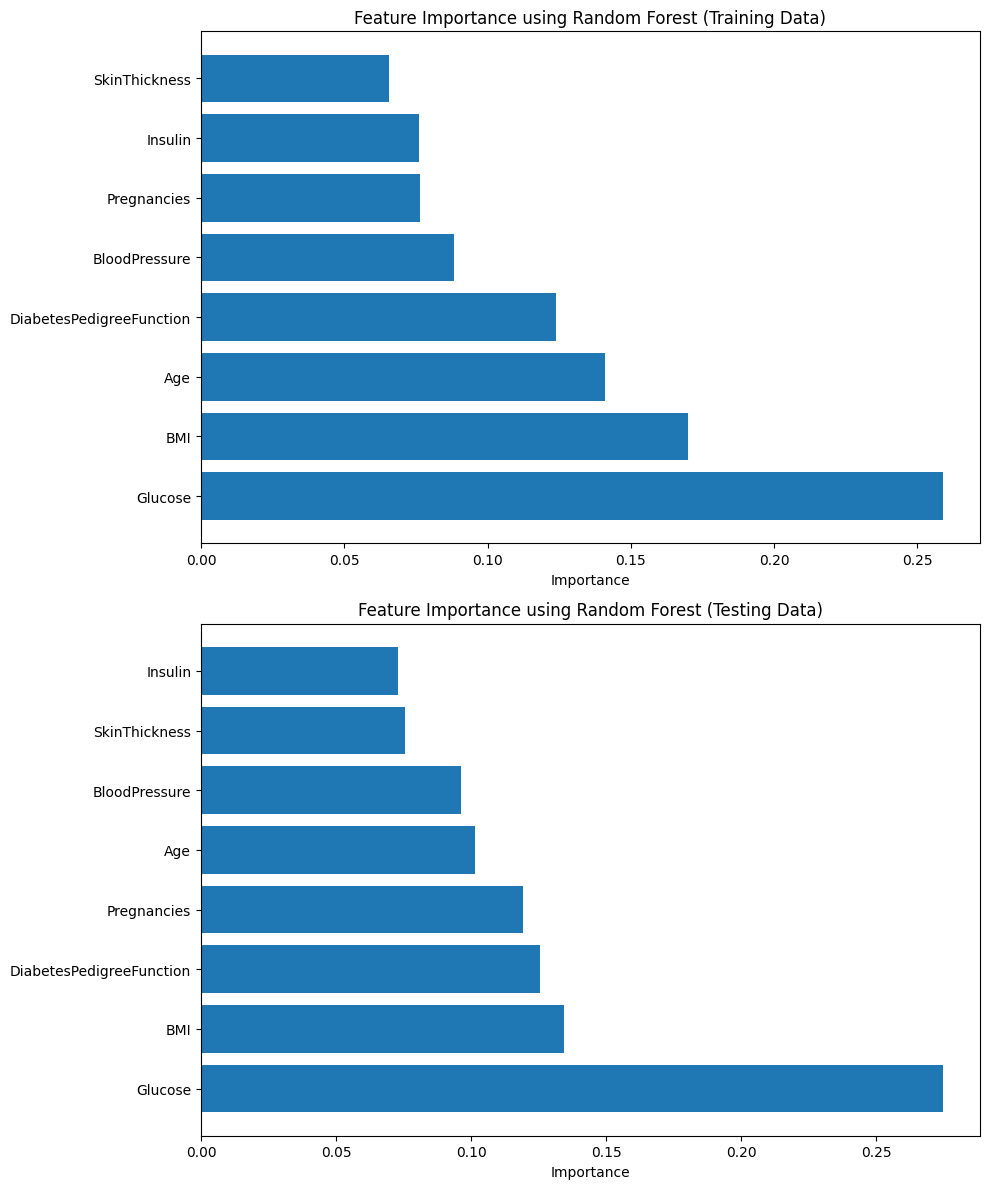

Training Data Feature Importance using Random Forest:
                     Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646

Testing Data Feature Importance using Random Forest:
                     Feature  Importance
1                   Glucose    0.274634
5                       BMI    0.134329
6  DiabetesPedigreeFunction    0.125646
0               Pregnancies    0.119250
7                       Age    0.101361
2             BloodPressure    0.096378
3             SkinThickness    0.075507
4                   Insulin    0.072896


In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Menyiapkan data fitur dan target untuk training
X_train_scaled = train_scaled_df.drop('Outcome', axis=1)  # Fitur dari data training
y_train = train_scaled_df['Outcome']  # Target: Outcome dari data training

# Menyiapkan data fitur dan target untuk testing
X_test_scaled = test_scaled_df.drop('Outcome', axis=1)  # Fitur dari data testing
y_test = test_scaled_df['Outcome']  # Target: Outcome dari data testing

# Melatih model Random Forest untuk data training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Mengambil pentingnya fitur untuk data training
train_feature_importances_rf = rf_model.feature_importances_

# Melatih model Random Forest untuk data testing
rf_model.fit(X_test_scaled, y_test)

# Mengambil pentingnya fitur untuk data testing
test_feature_importances_rf = rf_model.feature_importances_

# Menampilkan pentingnya fitur untuk data training
train_feature_df_rf = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': train_feature_importances_rf
})

# Menampilkan pentingnya fitur untuk data testing
test_feature_df_rf = pd.DataFrame({
    'Feature': X_test_scaled.columns,
    'Importance': test_feature_importances_rf
})

# Mengurutkan berdasarkan pentingnya fitur untuk training dan testing
train_feature_df_rf = train_feature_df_rf.sort_values(by='Importance', ascending=False)
test_feature_df_rf = test_feature_df_rf.sort_values(by='Importance', ascending=False)

# Membuat subplot untuk menampilkan visualisasi training dan testing secara terpisah
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Visualisasi pentingnya fitur untuk data training
axes[0].barh(train_feature_df_rf['Feature'], train_feature_df_rf['Importance'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance using Random Forest (Training Data)')

# Visualisasi pentingnya fitur untuk data testing
axes[1].barh(test_feature_df_rf['Feature'], test_feature_df_rf['Importance'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance using Random Forest (Testing Data)')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan fitur yang paling penting untuk data training dan testing
print("Training Data Feature Importance using Random Forest:\n", train_feature_df_rf)
print("\nTesting Data Feature Importance using Random Forest:\n", test_feature_df_rf)


# Pilih dan Eksekusi Feature Selection

In [19]:
# Menghapus fitur yang tidak diinginkan dari data training dan testing
columns_to_drop = ['SkinThickness', 'Insulin', 'Pregnancies', 'BloodPressure']  # Daftar fitur yang akan dihapus

# Menghapus fitur dari data training
train_scaled_df = train_scaled_df.drop(columns=columns_to_drop)

# Menghapus fitur dari data testing
test_scaled_df = test_scaled_df.drop(columns=columns_to_drop)

# Menyimpan hasil seleksi fitur ke file CSV
train_scaled_df.to_csv('diabetes_train_feature_selected.csv', index=False)
test_scaled_df.to_csv('diabetes_test_feature_selected.csv', index=False)

print("Fitur yang tidak diinginkan telah dihapus, dan data telah disimpan.")


Fitur yang tidak diinginkan telah dihapus, dan data telah disimpan.


# Data Training

In [20]:
# Menampilkan data training setelah penghapusan fitur
print("Data Training Setelah Penghapusan Fitur:")
print(train_scaled_df.head())


Data Training Setelah Penghapusan Fitur:
    Glucose       BMI  DiabetesPedigreeFunction       Age  Outcome
0  0.422111  0.000000                  0.096499  0.000000        0
1  0.562814  0.420268                  0.514091  0.483333        1
2  0.698492  0.427720                  0.245944  0.016667        0
3  0.809045  0.326379                  0.075149  0.733333        0
4  0.673367  0.688525                  0.068318  0.416667        1


# Data Testing

In [21]:
# Menampilkan data testing setelah penghapusan fitur
print("Data Testing Setelah Penghapusan Fitur:")
print(test_scaled_df.head())


Data Testing Setelah Penghapusan Fitur:
    Glucose       BMI  DiabetesPedigreeFunction       Age  Outcome
0  0.492462  0.506706                  0.150299  0.366667        0
1  0.562814  0.532042                  0.029889  0.000000        0
2  0.542714  0.459016                  0.034159  0.000000        0
3  0.537688  0.366617                  0.332195  0.216667        0
4  0.683417  0.445604                  0.056362  0.483333        0


# Latin Model K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Menyusun k_values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Latih model KNN untuk setiap nilai k dan simpan hasilnya
knn_models = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models[k] = knn

# Simpan model-model KNN dalam dictionary knn_models
print("Model KNN berhasil dilatih dengan berbagai nilai k.")


Model KNN berhasil dilatih dengan berbagai nilai k.


# Classification Report

In [23]:
# Menampilkan classification report untuk setiap model KNN
for k, model in knn_models.items():
    print(f"\nClassification Report untuk k = {k}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Classification Report untuk k = 1:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154


Classification Report untuk k = 3:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154


Classification Report untuk k = 5:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0

# Visualisasi Akurasi Setiap Nilai K

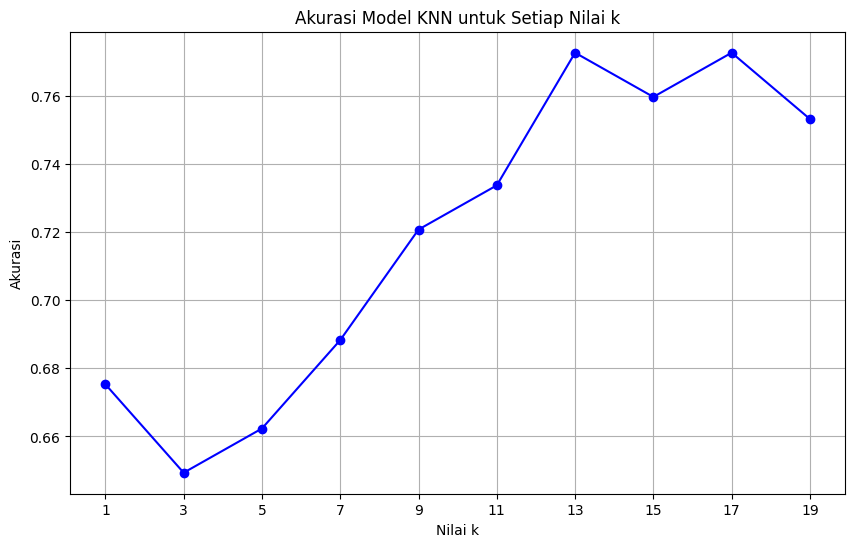


Akurasi untuk setiap nilai k:
k = 1: Akurasi = 0.6753
k = 3: Akurasi = 0.6494
k = 5: Akurasi = 0.6623
k = 7: Akurasi = 0.6883
k = 9: Akurasi = 0.7208
k = 11: Akurasi = 0.7338
k = 13: Akurasi = 0.7727
k = 15: Akurasi = 0.7597
k = 17: Akurasi = 0.7727
k = 19: Akurasi = 0.7532


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk setiap model KNN
accuracies = []
for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Membuat plot akurasi terhadap nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Akurasi Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Menampilkan list akurasi untuk setiap nilai k
print("\nAkurasi untuk setiap nilai k:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Akurasi = {accuracy:.4f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

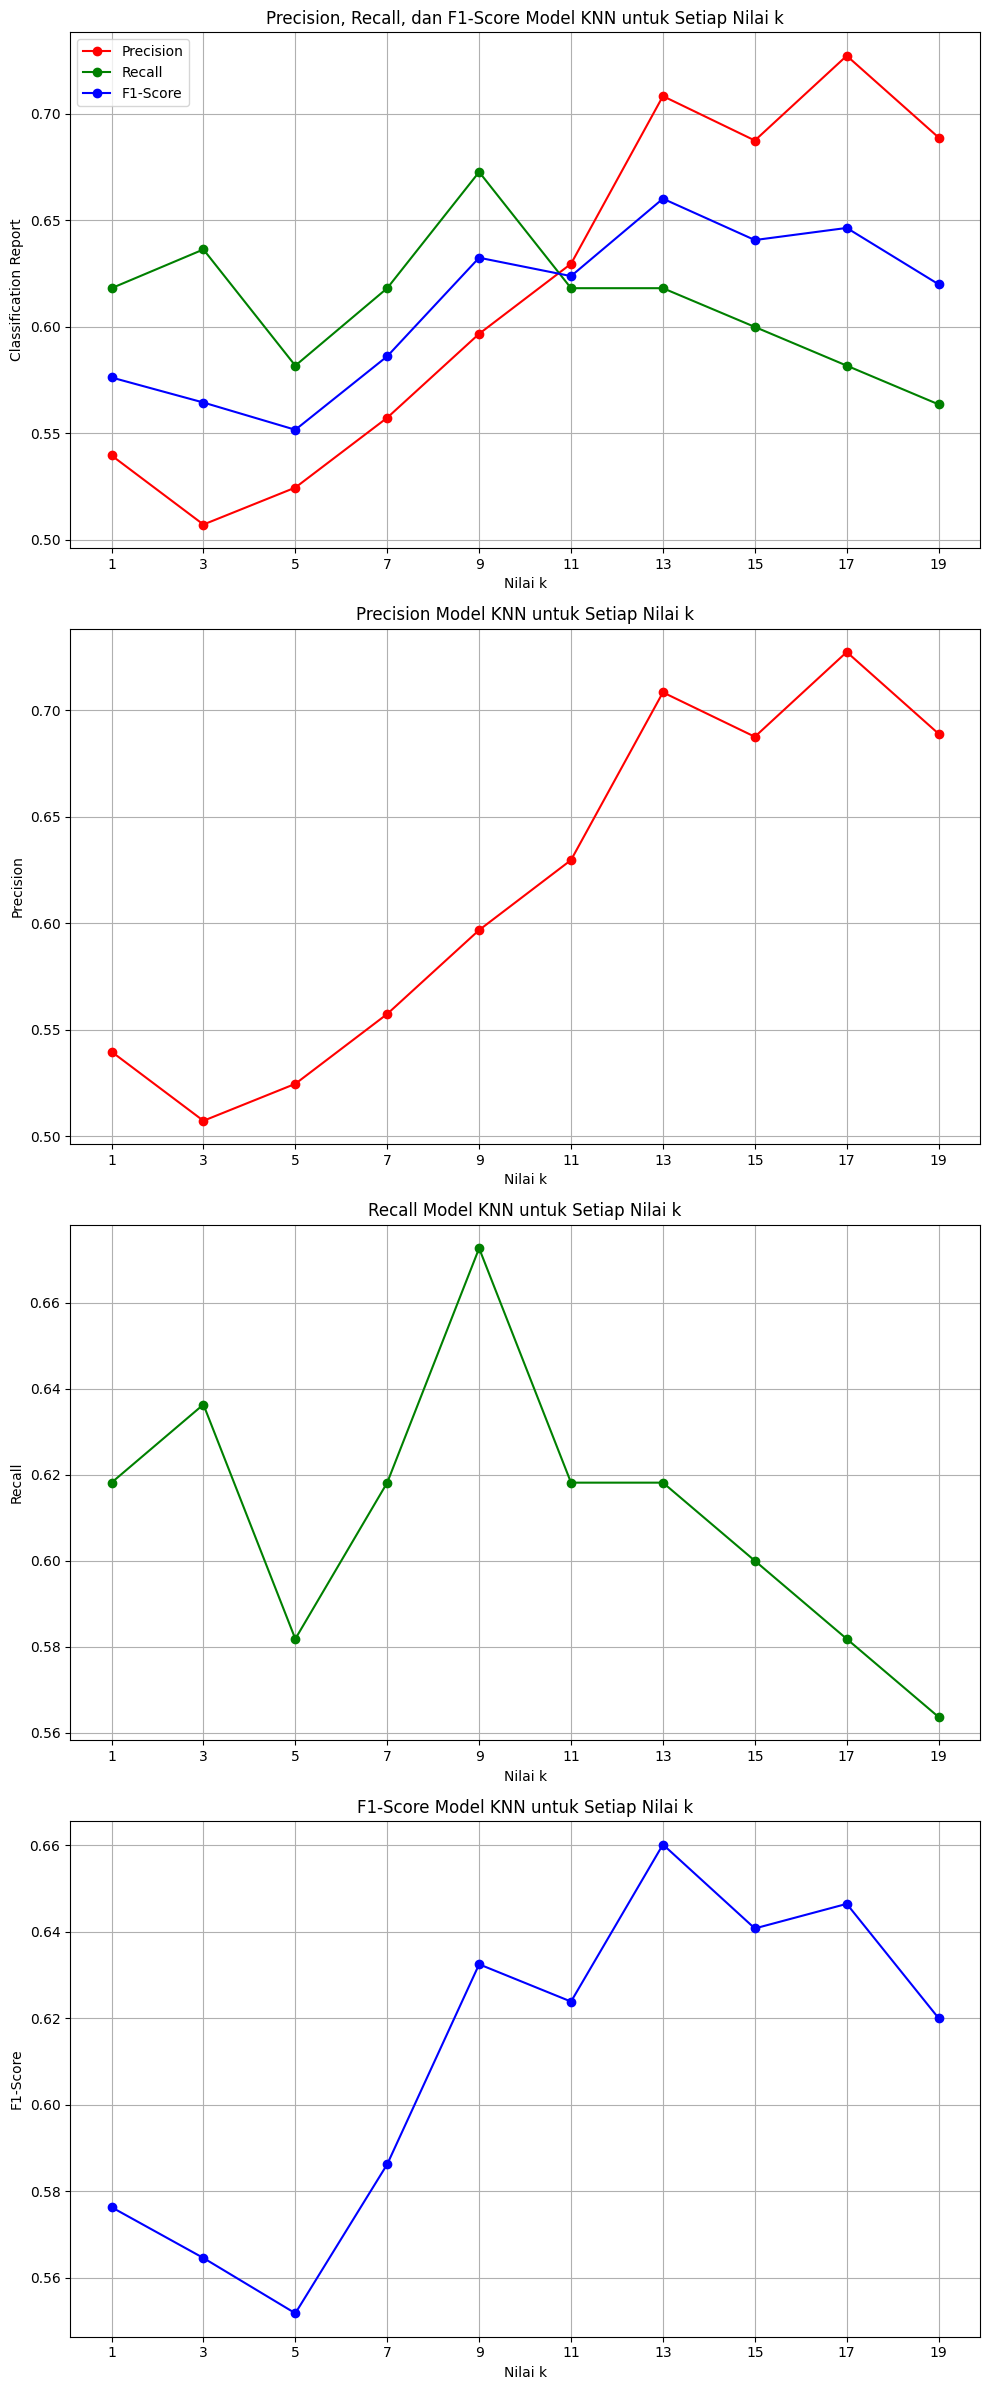


Precision, Recall, dan F1-Score untuk setiap nilai k:
k = 1: Precision = 0.5397, Recall = 0.6182, F1-Score = 0.5763
k = 3: Precision = 0.5072, Recall = 0.6364, F1-Score = 0.5645
k = 5: Precision = 0.5246, Recall = 0.5818, F1-Score = 0.5517
k = 7: Precision = 0.5574, Recall = 0.6182, F1-Score = 0.5862
k = 9: Precision = 0.5968, Recall = 0.6727, F1-Score = 0.6325
k = 11: Precision = 0.6296, Recall = 0.6182, F1-Score = 0.6239
k = 13: Precision = 0.7083, Recall = 0.6182, F1-Score = 0.6602
k = 15: Precision = 0.6875, Recall = 0.6000, F1-Score = 0.6408
k = 17: Precision = 0.7273, Recall = 0.5818, F1-Score = 0.6465
k = 19: Precision = 0.6889, Recall = 0.5636, F1-Score = 0.6200


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Menyimpan metrik precision, recall, dan f1-score untuk setiap model KNN
precisions = []
recalls = []
f1_scores = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Membuat subplots untuk menampilkan precision, recall, f1-score dan gabungannya
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

# Precision, Recall, F1-Score plot (gabungan dalam satu grafik) di posisi pertama
axes[0].plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
axes[0].plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
axes[0].plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label='F1-Score')
axes[0].set_title('Precision, Recall, dan F1-Score Model KNN untuk Setiap Nilai k')
axes[0].set_xlabel('Nilai k')
axes[0].set_ylabel('Classification Report')
axes[0].set_xticks(k_values)
axes[0].grid(True)
axes[0].legend()

# Precision plot
axes[1].plot(k_values, precisions, marker='o', linestyle='-', color='r')
axes[1].set_title('Precision Model KNN untuk Setiap Nilai k')
axes[1].set_xlabel('Nilai k')
axes[1].set_ylabel('Precision')
axes[1].set_xticks(k_values)
axes[1].grid(True)

# Recall plot
axes[2].plot(k_values, recalls, marker='o', linestyle='-', color='g')
axes[2].set_title('Recall Model KNN untuk Setiap Nilai k')
axes[2].set_xlabel('Nilai k')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(k_values)
axes[2].grid(True)

# F1-score plot
axes[3].plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
axes[3].set_title('F1-Score Model KNN untuk Setiap Nilai k')
axes[3].set_xlabel('Nilai k')
axes[3].set_ylabel('F1-Score')
axes[3].set_xticks(k_values)
axes[3].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan nilai precision, recall, dan f1-score untuk setiap k
print("\nPrecision, Recall, dan F1-Score untuk setiap nilai k:")
for k, precision, recall, f1 in zip(k_values, precisions, recalls, f1_scores):
    print(f"k = {k}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


# Hitung P-Values dengan ANOVA

In [26]:
from sklearn.feature_selection import f_classif
import numpy as np

# Menghitung P-Values untuk setiap fitur
f_values, p_values = f_classif(X_train, y_train)

# Menampilkan P-Values untuk setiap fitur
print("P-Values untuk setiap fitur:")
for feature, p_value in zip(X_train.columns, p_values):
    print(f"{feature}: P-Value = {p_value:.4f}")


P-Values untuk setiap fitur:
Pregnancies: P-Value = 0.0000
Glucose: P-Value = 0.0000
BloodPressure: P-Value = 0.0421
SkinThickness: P-Value = 0.1518
Insulin: P-Value = 0.0071
BMI: P-Value = 0.0000
DiabetesPedigreeFunction: P-Value = 0.0001
Age: P-Value = 0.0000


# Visualisasi P-Values dengan ANOVA

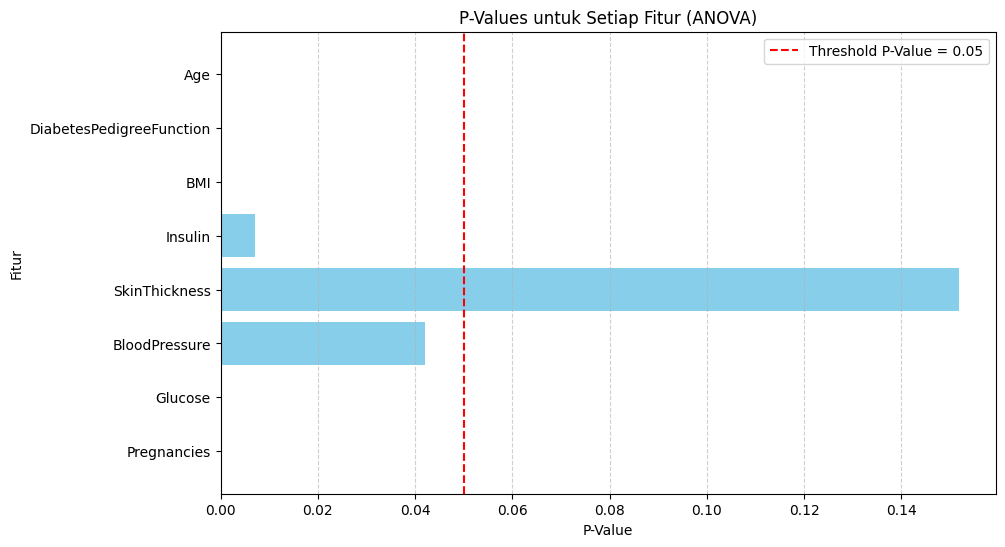

In [27]:
import matplotlib.pyplot as plt

# Membuat plot untuk P-Values
plt.figure(figsize=(10, 6))

# Membuat bar chart untuk P-Values
plt.barh(X_train.columns, p_values, color='skyblue')
plt.axvline(x=0.05, color='r', linestyle='--', label='Threshold P-Value = 0.05')  # Menambahkan threshold P-Value
plt.title('P-Values untuk Setiap Fitur (ANOVA)')
plt.xlabel('P-Value')
plt.ylabel('Fitur')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Menampilkan chart
plt.show()


# Hitung Specificity

In [28]:
from sklearn.metrics import confusion_matrix

# Menyimpan nilai Specificity untuk setiap model KNN
specificities = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    
    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Menghitung Specificity
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Menampilkan Specificity untuk setiap nilai k
print("Specificity untuk setiap nilai k:")
for k, specificity in zip(k_values, specificities):
    print(f"k = {k}: Specificity = {specificity:.4f}")


Specificity untuk setiap nilai k:
k = 1: Specificity = 0.7071
k = 3: Specificity = 0.6566
k = 5: Specificity = 0.7071
k = 7: Specificity = 0.7273
k = 9: Specificity = 0.7475
k = 11: Specificity = 0.7980
k = 13: Specificity = 0.8586
k = 15: Specificity = 0.8485
k = 17: Specificity = 0.8788
k = 19: Specificity = 0.8586


# Visualisasi Specificity Setiap Nilai K

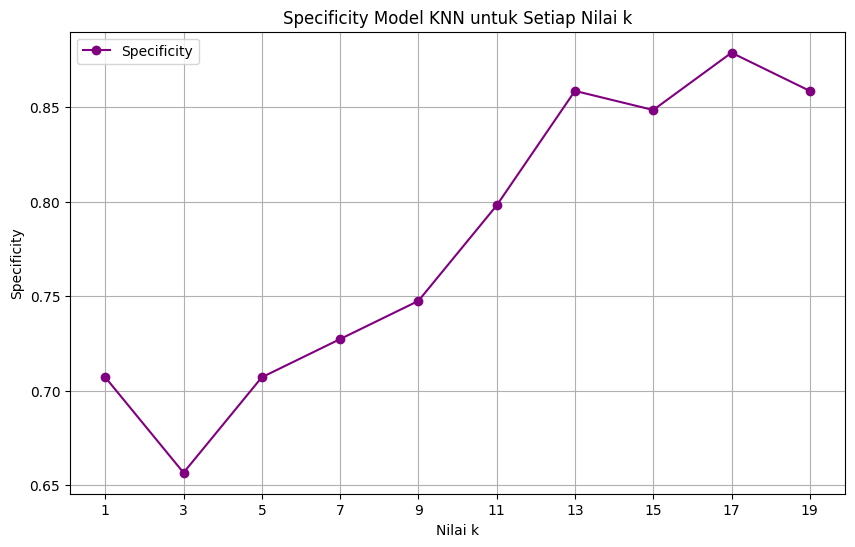

In [29]:
import matplotlib.pyplot as plt

# Membuat plot untuk Specificity terhadap nilai k
plt.figure(figsize=(10, 6))

# Plot Specificity
plt.plot(k_values, specificities, marker='o', linestyle='-', color='purple', label='Specificity')

# Menambahkan judul dan label
plt.title('Specificity Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Specificity')
plt.xticks(k_values)
plt.grid(True)

# Menambahkan legend
plt.legend()

# Menampilkan chart
plt.show()
